In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import net3d_v10_1 as n3
import igraph as ig
import os
import json

jlo= lambda s: json.load(open(s,'r'))
rs = lambda n,l: n**(1./3)*l**(-.5)
se = lambda s,a : int(s.split('.json')[0].split('-'+a)[1].split('-')[0])


Populating the interactive namespace from numpy and matplotlib


In [8]:
# nm = [(se(i,'n'),se(i,'L')) for i in lb]


In [2]:
mkdir ../../output/phase-finite-032818-1/

mkdir: cannot create directory ‘../../output/phase-finite-032818-1/’: File exists


# Rerun all sizes
We need an accurate measurement of the relaxation time. 
We should run sims for a large range, say `logspace(-3,3,20)*rc`, then also high resolution sims around the phase transition `logspace(-1,1,20)*rc`. 
We should also test to see if the scaling of the transition is different for lattice compared to ER and BA. We need to start the lattice from its perfect layout for this.

In [3]:
class netRads_flat(n3.netRads):
    def set_radii(self):
        #d = self.pts.shape[-1]
        #rs = lambda x: ((x**(d-1)).sum(-1))**(1./(d-1))+1e-5 # use root sum squared of weights as radii for 3D
        r0 = array([1]*len(self.Adj)) # rs(self.Adj)
        #self.degreesRS = r0
        self.rad_mat = self.params['nodes']['radius']*(r0+r0[:,newaxis])[:,:,newaxis]
        

In [4]:
# pth = '../../output/phase-finite-032418/'
pth = '../../output/phase-finite-032818-1/'

In [13]:
def lay_net(g, nam = 'ER-0', giant= True, **kw):
    if giant:
        gc = g.components()
        g1 = gc.giant()
    else: g1 = g
    pts = rand(g1.vcount(),3)
    edg = array(g1.get_edgelist())
    net = netRads_flat(pts,edg)
    net.gnam = nam+'-n%d-L%d' %( len(net.pts),len(net.elist))
    print net.gnam
    n3.iter_converge(net, max_its= 2e4, **kw)
    net.save(pth)

In [14]:
n = 200

for m in range(2,7,1):#range(2,15,2):
    g = ig.Graph.Barabasi(n,m=m) #Erdos_Renyi(n,p=p/n)
    lay_net(g,'BA-1',draw=False )
    l = g.ecount()
    g = ig.Graph.Erdos_Renyi(n,m=l ) #Erdos_Renyi(n,p=p/n)
    lay_net(g,'ER-1',draw=False )

BA-1-n200-L397
Beginning convergence check ...

2000) ct=1.3,  Has Not Converged! dlog<l>/dlog(t)~-0.0319 
Checks: (False, True, False)

3000) ct=1.3,  Has Not Converged! dlog<l>/dlog(t)~-0.0298 
Checks: (True, True, False)

4000) ct=1.3,  Has Not Converged! dlog<l>/dlog(t)~-0.0267 
Checks: (False, True, False)

5000) ct=1.3,  Has Not Converged! dlog<l>/dlog(t)~-0.0139 
Checks: (False, False, False)

6000) ct=1.3,  Has Not Converged! dlog<l>/dlog(t)~-0.0118 
Checks: (True, True, False)

7000) ct=1.3,  Has Not Converged! dlog<l>/dlog(t)~-0.0163 
Checks: (True, True, False)

8000) ct=1.3,  Converged! dlog<l>/dlog(t)~-0.0068 
Checks: (True, True, True)
ER-1-n198-L397
Beginning convergence check ...

2000) ct=0.49,  Converged! dlog<l>/dlog(t)~-0.00271 
Checks: (False, False, False)
BA-1-n200-L594
Beginning convergence check ...

2000) ct=2,  Has Not Converged! dlog<l>/dlog(t)~-0.00556 
Checks: (False, True, False)

3000) ct=2,  Has Not Converged! dlog<l>/dlog(t)~-0.0137 
Checks: (True, Fal

In [5]:
l = [i for i in os.listdir(pth) if 'th-r' not in i]
l

[]

In [83]:
lb = [i for i in l if 'BA' in i and 'txt' not in i]
lb

['BA-0-n50-L97.json',
 'BA-0-n200-L397.json',
 'BA-0-n100-L197.json',
 'BA-0-n50-L595.json',
 'BA-0-n100-L2322.json',
 'BA-0-n50-L949.json',
 'BA-0-n50-L1159.json',
 'BA-0-n200-L790.json']

In [6]:
# se = lambda s,a : int(s.split('.json')[0].split('-'+a)[1].split('-')[0])
# nm = [(se(i,'n'),se(i,'L')) for i in lb]

# for n,m in nm:#arange(2.,n,n/4):
#     g = ig.Graph.Erdos_Renyi(n,m=m) #Erdos_Renyi(n,p=p/n)
#     gc = g.components()
#     g1 = gc.giant()
#     pts = rand(g1.vcount(),3)
#     edg = array(g1.get_edgelist())
#     net = netRads_flat(pts,edg)
#     net.gnam = 'ER-0-n%d-L%d' %( len(net.pts),len(net.elist))
#     print net.gnam
#     n3.iter_converge(net)
#     net.save(pth)

In [88]:
g = ig.Graph.Erdos_Renyi(200,m=397)
gc = g.components()
g1 = gc.giant()
g1.vcount(),g1.ecount()


(195, 397)

BA-0-n200-L790
dt(s) = 10.7


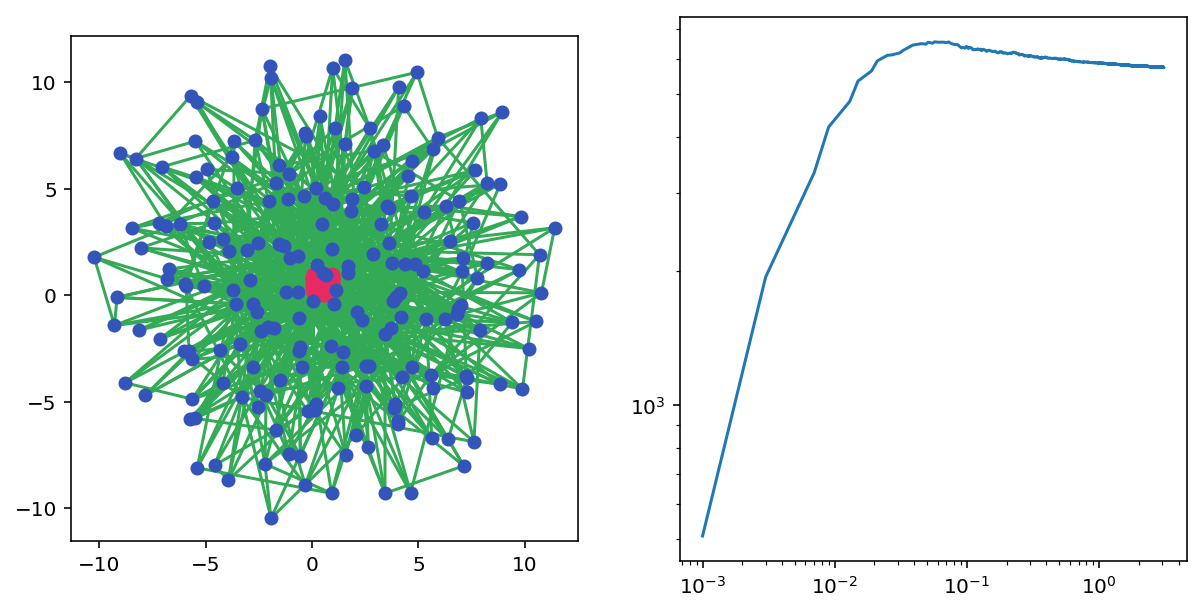

Beginning convergence check ...
dt(s) = 10.7


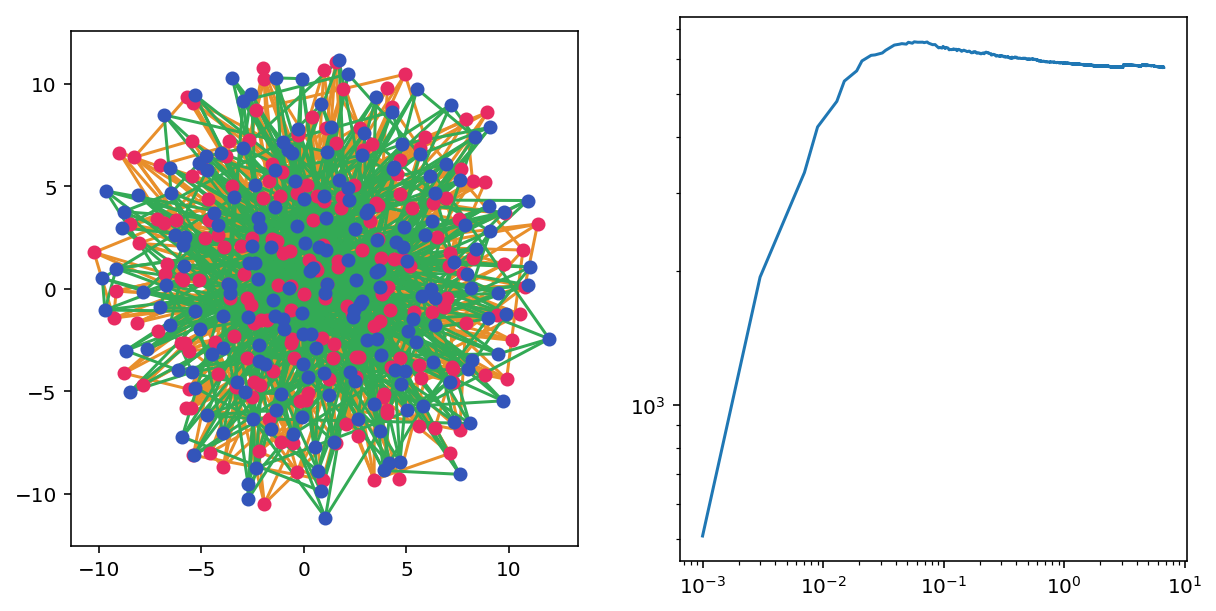


2000) ct=2.2,  Has Not Converged! dlog<l>/dlog(t)~-0.013 
Checks: (False, False, False)
dt(s) = 10.7


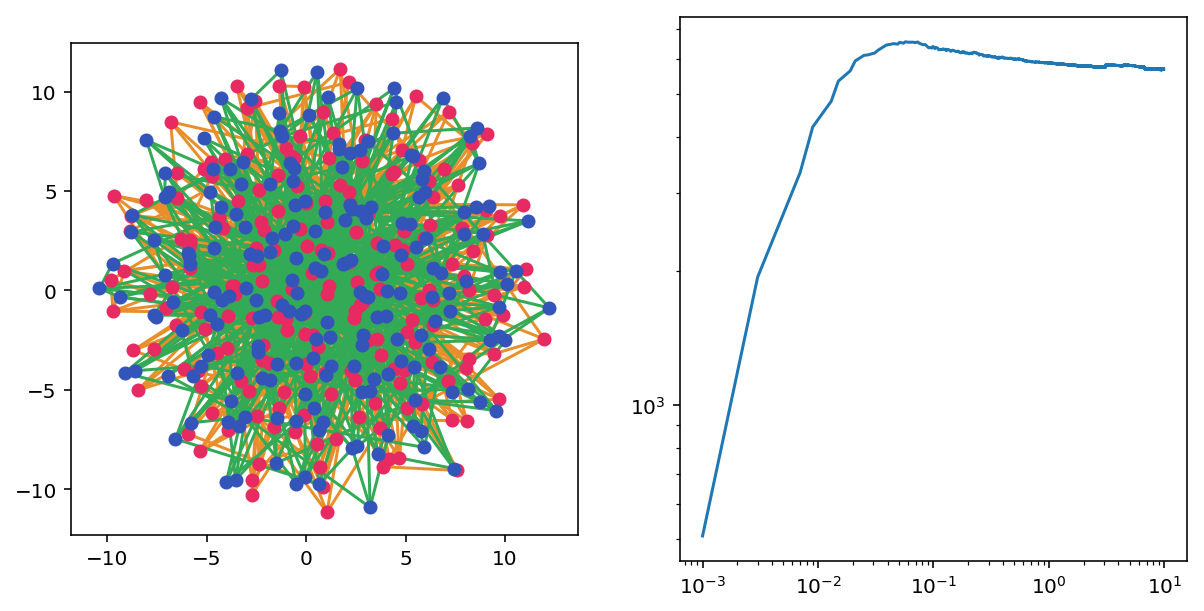


3000) ct=2.2,  Has Not Converged! dlog<l>/dlog(t)~-0.024 
Checks: (False, True, False)
dt(s) = 10.9


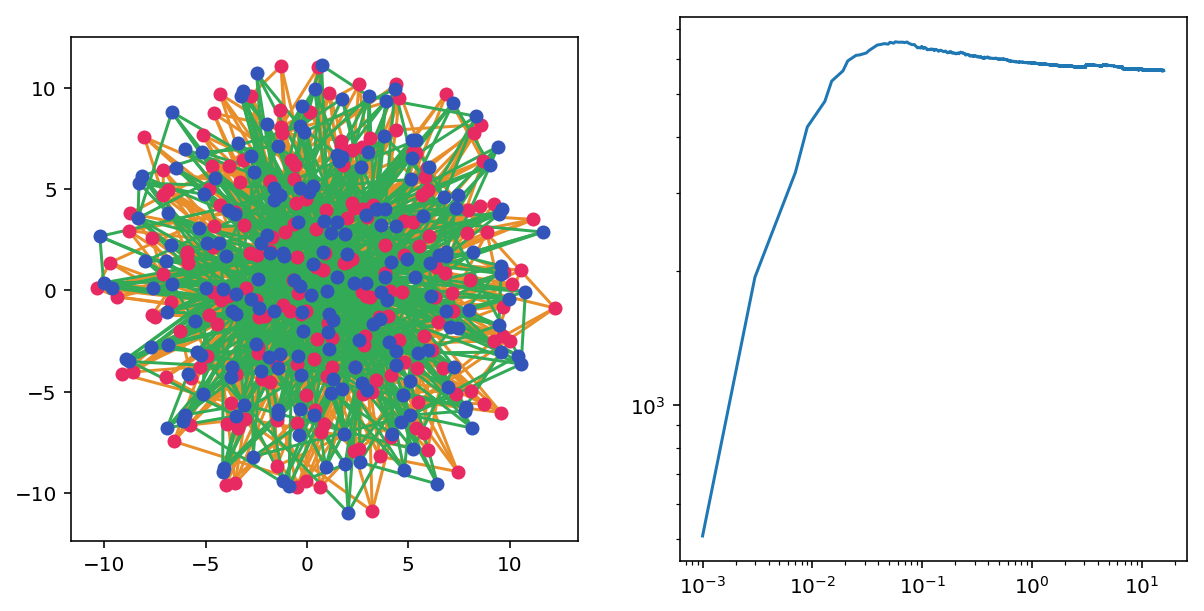


4000) ct=2.2,  Has Not Converged! dlog<l>/dlog(t)~-0.0172 
Checks: (False, True, False)
dt(s) = 10.7


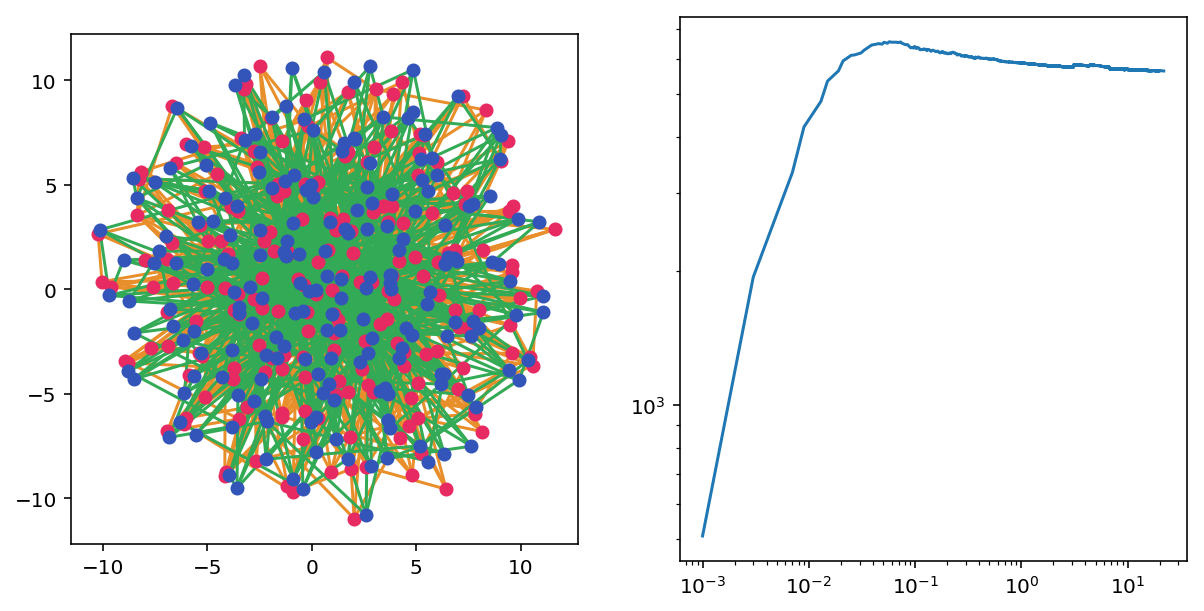


5000) ct=2.2,  Converged! dlog<l>/dlog(t)~-0.00962 
Checks: (False, True, True)


In [79]:

n= 200
# p = 2./n
for p in [4]:#arange(2.,n,n/4):
    g = ig.Graph.Barabasi(n,m=int(p)) #Erdos_Renyi(n,p=p/n)
    gc = g.components()
    g1 = gc.giant()
    g1.vcount(),g1.ecount()
    pts = rand(g1.vcount(),3)
    edg = array(g1.get_edgelist())
    net = netRads_flat(pts,edg)
    net.gnam = 'BA-0-n%d-L%d' %( len(net.pts),len(net.elist))
    print net.gnam
    n3.iter_converge(net)
    net.save(pth)

In [58]:
g = ig.Graph.Erdos_Renyi(n,p=p)
# pts = rand(n,3)
# edg = array(g.get_edgelist())

gc = g.components()
g1 = gc.giant()
g1.vcount(),g1.ecount()

(161, 202)

In [59]:
pts = rand(g1.vcount(),3)
edg = array(g1.get_edgelist())

In [60]:
(len(pts), len(edg)), rs(len(pts), len(edg))

((161, 202), 0.38276563593955243)

In [61]:
net = netRads_flat(pts,edg)

dt(s) = 7.15


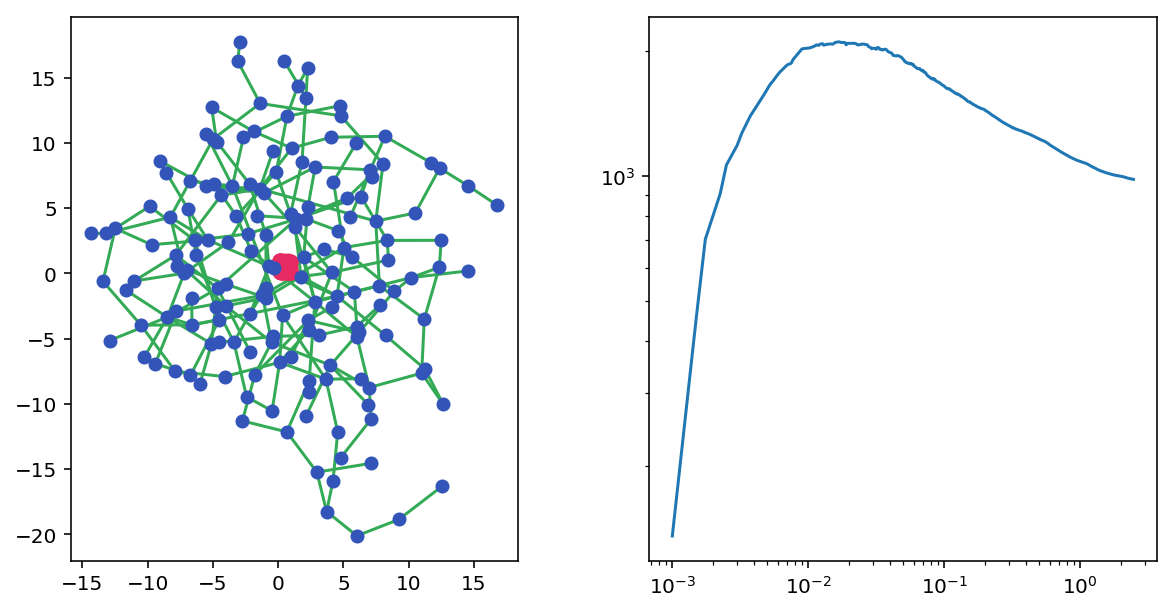

Beginning convergence check ...
dt(s) = 7.16


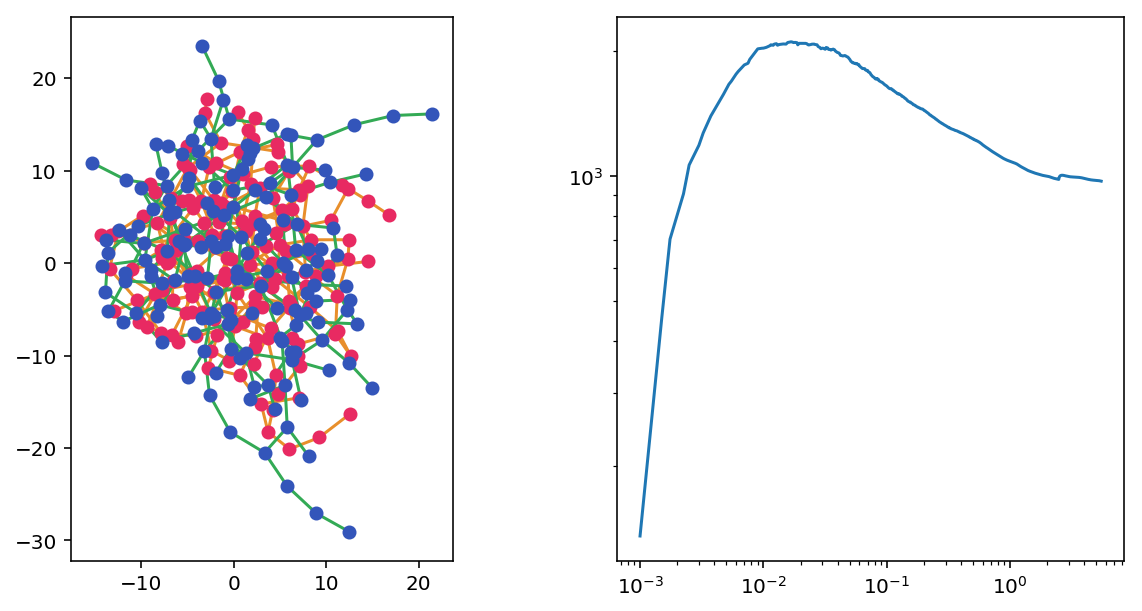


2000) ct=0.32,  Has Not Converged! dlog<l>/dlog(t)~-0.0244 
Checks: (False, True, False)
dt(s) = 7.19


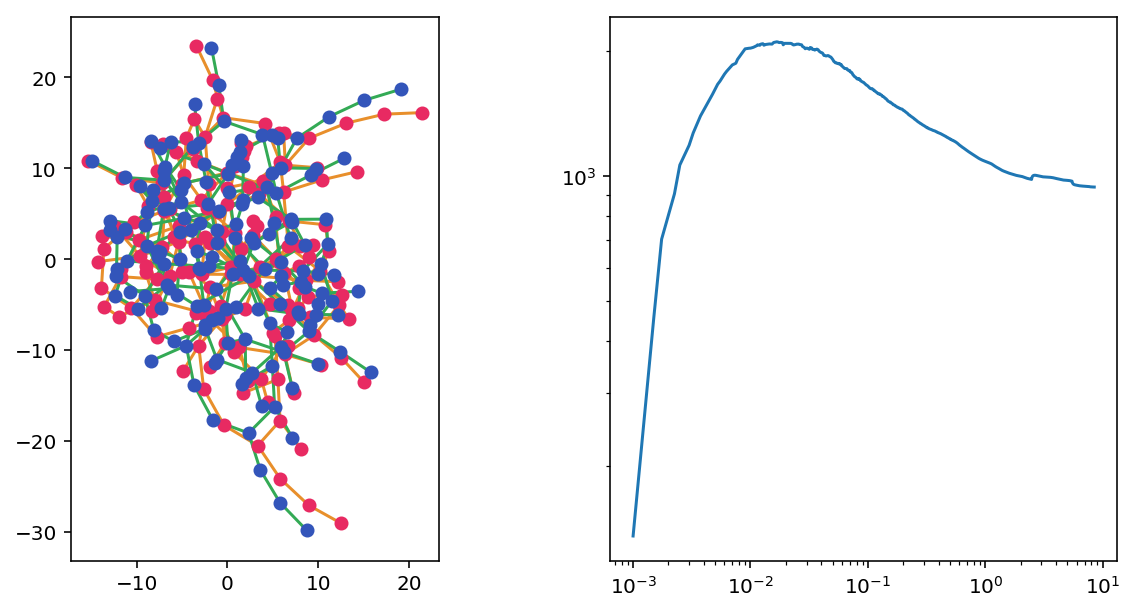


3000) ct=0.32,  Has Not Converged! dlog<l>/dlog(t)~-0.0638 
Checks: (True, True, False)
dt(s) = 7.19


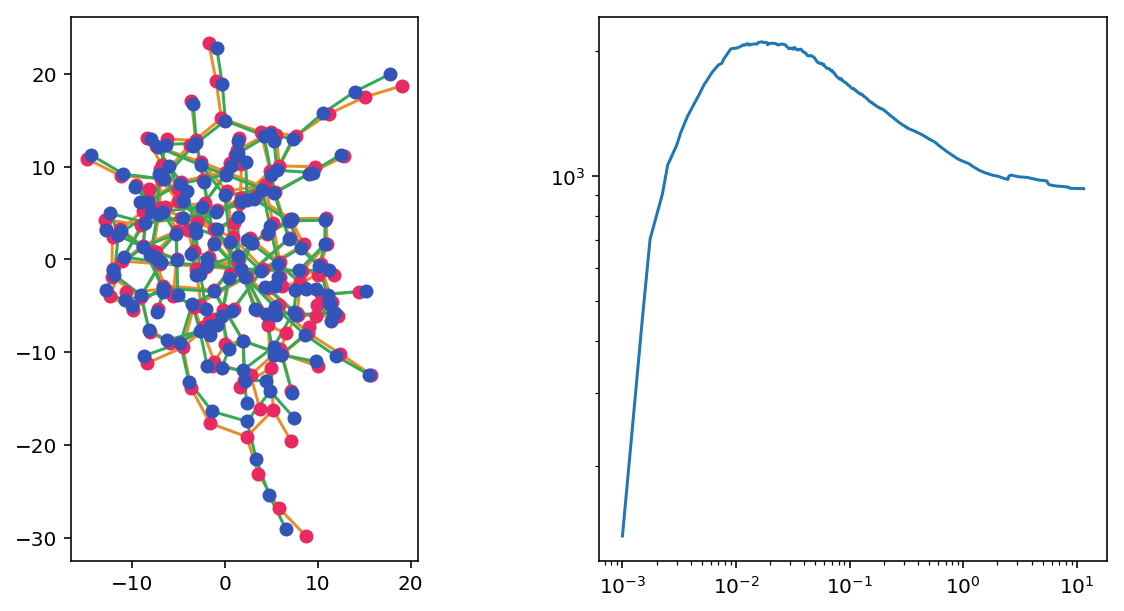


4000) ct=0.32,  Has Not Converged! dlog<l>/dlog(t)~-0.0259 
Checks: (True, True, False)
dt(s) = 7.19


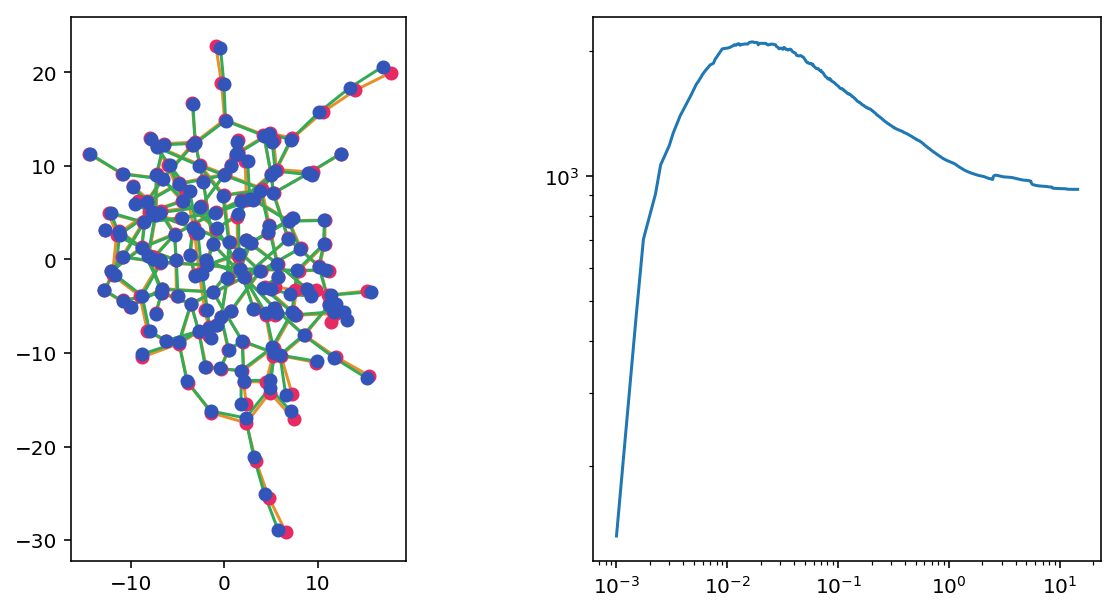


5000) ct=0.32,  Has Not Converged! dlog<l>/dlog(t)~-0.0153 
Checks: (True, True, False)
dt(s) = 7.15


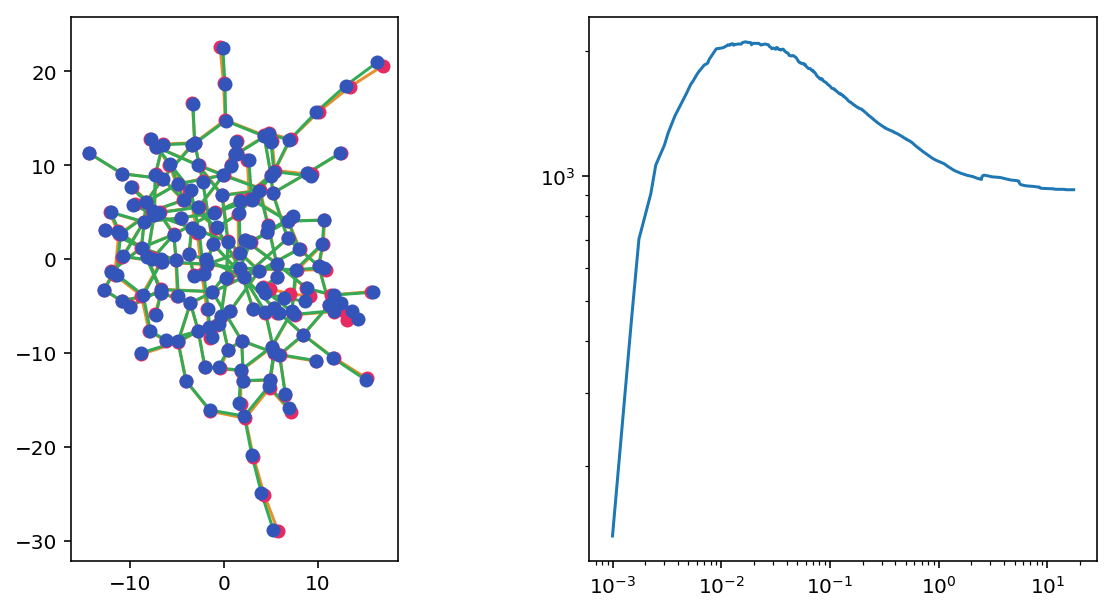


6000) ct=0.32,  Has Not Converged! dlog<l>/dlog(t)~-0.0108 
Checks: (True, True, False)
dt(s) = 7.18


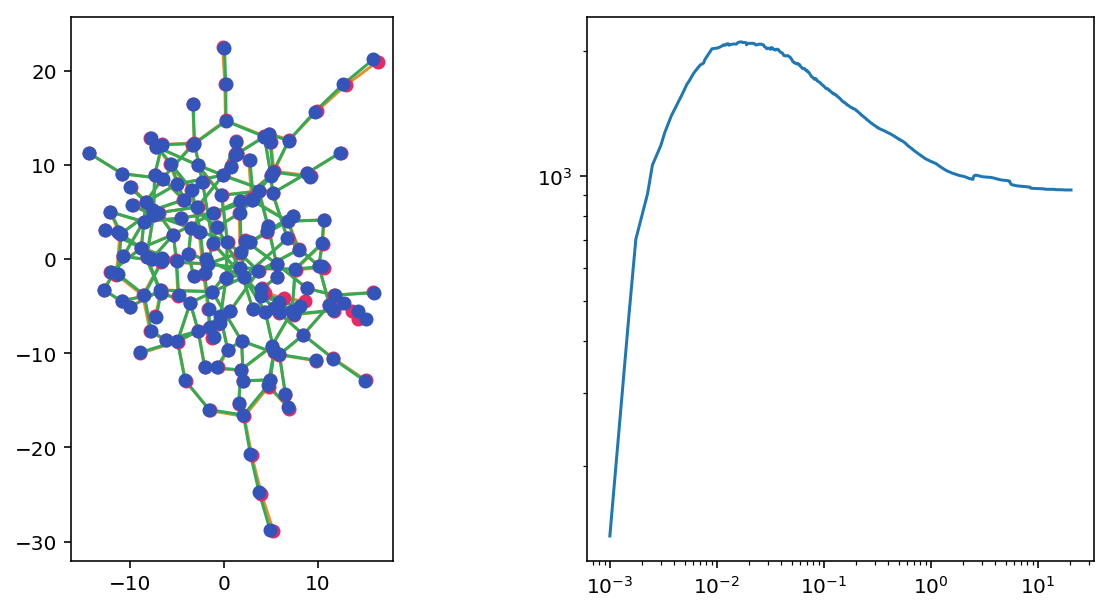


7000) ct=0.32,  Converged! dlog<l>/dlog(t)~-0.00852 
Checks: (True, True, True)


In [63]:
n3.iter_converge(net)

In [20]:
mkdir ../../output/phase-finite-032418/

In [21]:
(net.Adj.sum(0) ==0).sum()

0

In [65]:
net.gnam = 'ER-0-n%d-L%d' %( len(net.pts),len(net.elist))
print net.gnam
net.save('../../output/phase-finite-032418/')

ER-0-n161-L202


(200, 824)